# Выполнил студент группы БВТ2104 Юдин Артём Андреевич

Написать программу, которая будет считывать данные из CSV файла, содержащего
информацию о продажах товаров в магазине. Данные в файле содержатся в следующем
формате:

| Номер заказа | Дата заказа | Название товара | Категория товара | Количество продаж | Цена
за единицу | Общая стоимость |

Необходимо:
1. Рассчитать общую выручку магазина.
2. Найти товар, который был продан наибольшее количество раз.
3. Найти товар, который принес наибольшую выручку.
4. Составить отчет, содержащий информацию об общей выручке магазина, количестве
проданных единиц каждого товар и доле каждого товара в общей выручке.
Для решения задач необходимо использовать структуры данных, такие как массивы и
хеш-таблицы, а также различные алгоритмы обработки данных, например, сортировку и поиск.
Также необходимо учитывать возможные ошибки ввода-вывода и обрабатывать их в
соответствии с требованиями.

# Оглавление
0. [Prep](#prep)
1. [Задание 1](#taks1)
2. [Задание 2](#task2)
3. [Задание 3](#task3)
4. [Задание 4](#task4)

# Prep <a class="anchor" id="prep"></a>

In [1]:
import random  # for quick_sort
import numpy as np  # for data filtering
import pandas as pd  # for data output
import matplotlib.pyplot as plt  # for data output

from typing import List  # for annotation

In [54]:
csv = []
filt = np.array([False, False, True, False, True, False, True])

try:
    with open("table.csv", encoding="utf-8") as file:
        for line in file.readlines():
            a = np.array(str(line).split(";"))
            a = a[filt]
            a = a.tolist()
            a[-1] = a[-1][:-1]
            csv.append(a)
    csv.pop(0)

except:
    print("File error")

In [55]:
def partition(array: list[int], low: int, high: int) -> int:
    pivot = random.randrange(low, high)
    array[low], array[pivot] = array[pivot], array[low]

    i = low + 1

    for j in range(low + 1, high + 1):
        if array[j] <= array[low]:
            array[i], array[j] = array[j], array[i]
            i += 1

    array[low], array[i - 1] = array[i - 1], array[low]

    return i - 1


def quick_sort(array: List[int], low: int, high: int) -> List[int]:
    if low < high:
        pivot_index = partition(array, low, high)

        quick_sort(array, low, pivot_index - 1)
        quick_sort(array, pivot_index + 1, high)

In [56]:
def search(array: List[int], start: int, target: int) -> int:
    for ind in range(start, len(array)):
        if target == array[ind]:
            return ind

    return None

In [57]:
def counter(array: List[int], target: int) -> int:
    ans = 0

    for i in array:
        if i == target:
            ans += 1

    return ans

In [58]:
def summator(array: List[int]) -> int:
    ans = 0

    for i in array:
        ans += i

    return ans

In [59]:
def addition(large_arr: List[int], array: List[int]) -> None:
    large_arr.append(array)
    return large_arr

In [60]:
csv = addition(csv, ["Nintendo Switch", "450", "8594344"])
csv

[['Apple iPhone 14', '500', '44995000'],
 ['Samsung Galaxy S22 Ultra', '300', '29997000'],
 ['Игровые приставки', '200', '11998000'],
 ['LG OLED TV', '150', '26998500'],
 ['Apple MacBook Pro 16', '100', '19999000'],
 ['Canon EOS R7', '50', '12499500'],
 ['Bose QuietComfort 55', '100', '3499000'],
 ['Samsung Galaxy Tab S8', '75', '5249250'],
 ['DJI Mavic 3', '25', '3749750'],
 ['Philips Hue Smart Bulbs', '500', '1495000'],
 ['Apple iPad Pro 12.9', '200', '17998000'],
 ['Sony PlayStation 5 Pro', '100', '5999000'],
 ['Samsung Galaxy Watch 5', '150', '4498500'],
 ['LG UltraFine', '50', '4999500'],
 ['Canon EOS R8', '75', '22499250'],
 ['Bose SoundLink Revolve+', '100', '2499000'],
 ['DJI Ronin 4D', '25', '12499750'],
 ['Samsung Galaxy Book Pro', '50', '6499500'],
 ['Philips Sonicare DiamondClean', '200', '1998000'],
 ['Nest Learning Thermostat', '100', '199900'],
 ['Nintendo Switch', '450', '8594344']]

# Задание 1 <a class="anchor" id="task1"></a>

In [61]:
csv = np.array(csv)
try:
    money = list(map(int, csv[:, 2]))

except:
    print("Not all revenue are convertable to int")
    exit()
print(f"Total revenue: {summator(money)}")

Total revenue: 248764744


# Задание 2 <a class="anchor" id="task2"></a>

In [62]:
try:
    sells = list(map(int, csv[:, 1]))

except:
    print("Not all sells are convertable to int")
    exit()

sorted_sells = list(map(int, csv[:, 1]))
quick_sort(sorted_sells, 0, len(sells) - 1)
c = counter(sorted_sells, sorted_sells[-1])
i = 0
curr_ind = 0

while i < c:
    print(
        f"Best sells: {csv[search(sells, curr_ind, sorted_sells[-1])][0]} - {sorted_sells[-1]}"
    )
    curr_ind = search(sells, curr_ind, sorted_sells[-1]) + 1
    i += 1


Best sells: Apple iPhone 14 - 500
Best sells: Philips Hue Smart Bulbs - 500


# Задание 3 <a class="anchor" id="task3"></a>

In [63]:
sorted_money = list(map(int, csv[:, 2]))
quick_sort(sorted_money, 0, len(money) - 1)
c = counter(sorted_money, sorted_money[-1])
i = 0
curr_ind = 0

while i < c:
    print(
        f"Best earnings: {csv[search(money, curr_ind, sorted_money[-1])][0]} - {sorted_money[-1]}"
    )
    curr_ind = search(money, curr_ind, sorted_money[-1]) + 1
    i += 1

Best earnings: Apple iPhone 14 - 44995000


# Задание 4 <a class="anchor" id="task4"></a>

In [64]:
sum_money = summator(money)
hash_map = {}
last_sorted_sells = max(sorted_sells) + 1
share2 = []
amount_money = []

for i in range(len(csv) - 1, -1, -1):
    if last_sorted_sells == sorted_sells[i]:
        j = search(sells, curr_ind, sorted_sells[i])

    else:
        j = search(sells, 0, sorted_sells[i])

    curr_ind = j + 1
    last_sorted_sells = sorted_sells[i]
    key = str(csv[j][0])
    share = int(csv[j][2])
    hash_map[key] = [sorted_sells[i], 100 * share / sum_money]
    amount_money.append(share)
    share2.append(100 * share / sum_money)

sorted_sells.reverse()
hash_map

{'Apple iPhone 14': [500, 18.087370129908763],
 'Philips Hue Smart Bulbs': [500, 0.6009694042496633],
 'Nintendo Switch': [450, 3.4548078886934235],
 'Samsung Galaxy S22 Ultra': [300, 12.058380748680367],
 'Игровые приставки': [200, 4.823030710493285],
 'Apple iPad Pro 12.9': [200, 7.234948051963505],
 'Philips Sonicare DiamondClean': [200, 0.8031684747095834],
 'LG OLED TV': [150, 10.853025057280625],
 'Samsung Galaxy Watch 5': [150, 1.808335026767298],
 'Apple MacBook Pro 16': [100, 8.039322485343824],
 'Bose QuietComfort 55': [100, 1.406549796300717],
 'Sony PlayStation 5 Pro': [100, 2.4115153552466424],
 'Bose SoundLink Revolve+': [100, 1.0045635727223468],
 'Nest Learning Thermostat': [100, 0.08035704609331618],
 'Samsung Galaxy Tab S8': [75, 2.110126184118759],
 'Canon EOS R8': [75, 9.044388540845643],
 'Canon EOS R7': [50, 5.024626801617837],
 'LG UltraFine': [50, 2.009730124780061],
 'Samsung Galaxy Book Pro': [50, 2.6127094601476166],
 'DJI Mavic 3': [25, 1.5073478418629933],


In [65]:
df2 = pd.DataFrame(
    {
        "Name": hash_map.keys(),
        "Sells": sorted_sells,
        "Amount of money": amount_money,
        "Total share": share2,
    }
)
df2

,Name,Sells,Amount of money,Total share
0,Apple iPhone 14,500,44995000,18.087370
1,Philips Hue Smart Bulbs,500,1495000,0.600969
2,Nintendo Switch,450,8594344,3.454808
3,Samsung Galaxy S22 Ultra,300,29997000,12.058381
4,Игровые приставки,200,11998000,4.823031
5,Apple iPad Pro 12.9,200,17998000,7.234948
6,Philips Sonicare DiamondClean,200,1998000,0.803168
7,LG OLED TV,150,26998500,10.853025
8,Samsung Galaxy Watch 5,150,4498500,1.808335
9,Apple MacBook Pro 16,100,19999000,8.039322


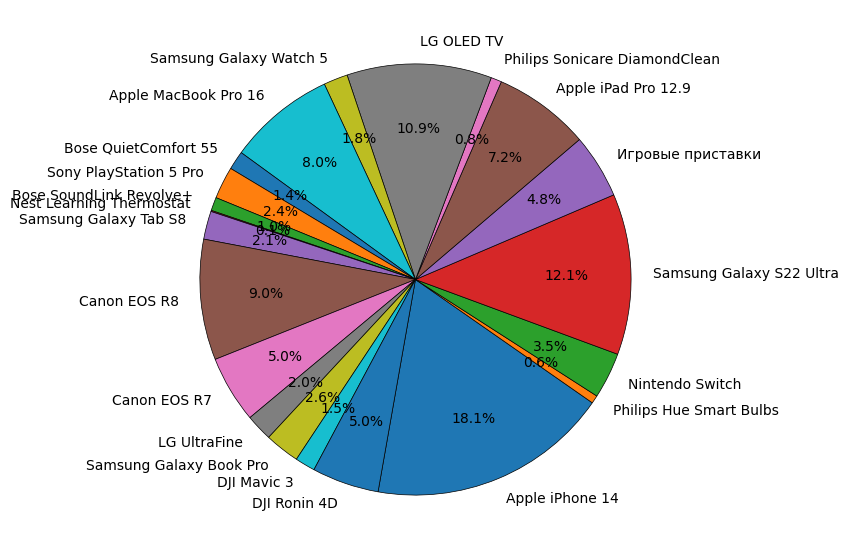

In [66]:
fig, ax = plt.subplots()
wedges = ax.pie(
    share2,
    wedgeprops={"edgecolor": "k", "linewidth": 0.5},
    labels=hash_map.keys(),
    startangle=260,
    autopct="%1.1f%%",
    pctdistance=0.7,
)

fig.set_figheight(7)
fig.set_figwidth(13)

In [4]:
a = 0.2 * np.random.random((3, 4)) - 0.1
a

array([[ 0.08750139,  0.04735486, -0.00187133, -0.00290274],
       [ 0.08984457, -0.05592278, -0.07696824, -0.04780257],
       [ 0.08350601, -0.07893364, -0.01958199,  0.03899298]])